In [1]:
"""
plots for plane cross dataset
adapted from: 11_crossplots.ipynb

Shaina Lu
Zaodr & Gillis Labs
June 2020
"""

'\nplots for plane cross dataset\nadapted from: 11_crossplots.ipynb\n\nShaina Lu\nZaodr & Gillis Labs\nJune 2020\n'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

In [3]:
#function for matplotlib formatting
def set_style():
    plt.style.use(['seaborn-white','seaborn-notebook'])
    plt.rcParams['figure.figsize'] = [6,4]
    plt.rcParams['axes.spines.top'] = False       #remove top line
    plt.rcParams['axes.spines.right'] = False     #remove right line
    plt.rcParams['axes.linewidth'] = 2.0          #set weight of axes
    plt.rcParams['axes.titlesize'] = 20           #set font size of title
    plt.rcParams['axes.labelsize'] = 18           #set font size of x,y labels
    plt.rcParams['axes.labelpad'] = 14            #space between labels and axes
    plt.rcParams['xtick.labelsize'] = 14          #set x label size
    plt.rcParams['ytick.labelsize'] = 14          #set y label size
    plt.rcParams['legend.fontsize'] = 16          #set legend font size
    
set_style()

In [52]:
def allkdeplts(train, test, cross1, cross2, traindataset, cross1dataset, cross2dataset, modeldes, ymaxval, savefile):
    if type(train) != bool:
        sns.kdeplot(train.values[np.triu_indices_from(train, k=1)], label="%s train" %traindataset,color='C2')
        
    if type(test) != bool:
        sns.kdeplot(test.values[np.triu_indices_from(test, k=1)], label="%s test (within)" %traindataset, color='C0')
        plt.vlines(x=np.mean(test.values[np.triu_indices_from(test, k=1)]), ymin=0, ymax=ymaxval, linestyles='--',color='C0')

    if type(cross1) != bool:
        sns.kdeplot(cross1.values[np.triu_indices_from(cross1.values, k=1)], label="%s trained in %s (cross)" %(cross1dataset,traindataset), color='C1')
        plt.vlines(x=np.mean(cross1.values[np.triu_indices_from(cross1, k=1)]), ymin=0, ymax=ymaxval, linestyles='--',color='C1')
        
    if type(cross2) != bool:
        sns.kdeplot(cross2.values[np.triu_indices_from(cross2.values, k=1)], label="%s trained in %s (cross)" %(cross2dataset,traindataset), color='C3')
        plt.vlines(x=np.mean(cross2.values[np.triu_indices_from(cross2, k=1)]), ymin=0, ymax=ymaxval, linestyles='--',color='C3')

    plt.xlabel("AUROC\n%s"%modeldes)
    plt.ylabel("density")
    plt.legend(loc=[1.0,0.5])

    if savefile != 0:
        plt.savefig(savefile, bbox_inches='tight')
    plt.show()

In [42]:
def uppertrimean(data):
    return np.mean(data.values[np.triu_indices_from(data, k=1)])

# ST train, alpha = 0.1

### Read in Data

In [4]:
TRAIN_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_STtrain_0p1_053120.csv"
TEST_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_STtest_0p1_053120.csv"
CROSS1_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_STtoCOR_0p1_053120.csv"
CROSS2_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_STtoSAG_0p1_053120.csv"

In [5]:
trainST0p1 = pd.read_csv(TRAIN_FILE, sep=',')
trainST0p1 = trainST0p1.set_index(trainST0p1.columns)

testST0p1 = pd.read_csv(TEST_FILE, sep=',')
testST0p1 = testST0p1.set_index(testST0p1.columns)

STtoCOR0p1 = pd.read_csv(CROSS1_FILE, sep=',')
STtoCOR0p1 = STtoCOR0p1.set_index(STtoCOR0p1.columns)

STtoSAG0p1 = pd.read_csv(CROSS2_FILE, sep=',')
STtoSAG0p1 = STtoSAG0p1.set_index(STtoSAG0p1.columns)

In [6]:
trainST0p1.shape

(445, 445)

In [43]:
#means
print(uppertrimean(trainST0p1))
print(uppertrimean(testST0p1))
print(uppertrimean(STtoCOR0p1))
print(uppertrimean(STtoSAG0p1))

0.9915298675330028
0.9088873699624621
0.8883705778753329
0.6713483368307476


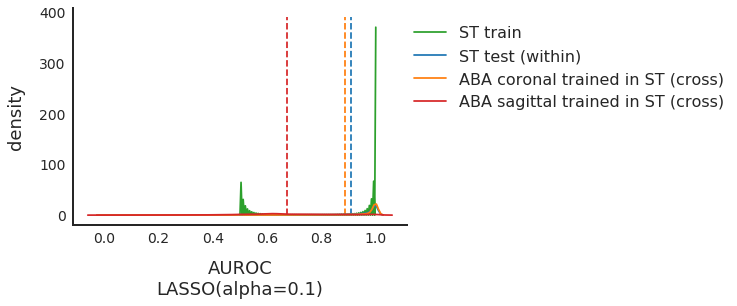

In [33]:
allkdeplts(trainST0p1, testST0p1, STtoCOR0p1, STtoSAG0p1, "ST", "ABA coronal", "ABA sagittal", "LASSO (alpha=0.1)",390, False)

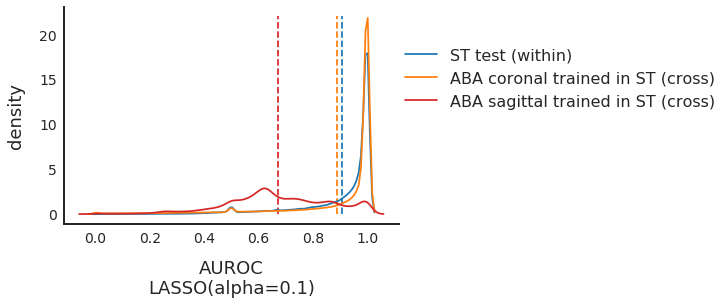

In [36]:
allkdeplts(False, testST0p1, STtoCOR0p1, STtoSAG0p1, "ST", "ABA coronal", "ABA sagittal", "LASSO (alpha=0.1)", 22, "060220_1.pdf")

# ST train, alpha = 0.05

### Read in Data

In [44]:
TRAIN_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_STtrain_0p05_052820.csv"
TEST_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_STtest_0p05_052820.csv"
CROSS1_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_STtoCOR_0p05_052820.csv"
CROSS2_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_STtoSAG_0p05_052820.csv"

In [45]:
trainST0p05 = pd.read_csv(TRAIN_FILE, sep=',')
trainST0p05 = trainST0p05.set_index(trainST0p05.columns)

testST0p05 = pd.read_csv(TEST_FILE, sep=',')
testST0p05 = testST0p05.set_index(testST0p05.columns)

STtoCOR0p05 = pd.read_csv(CROSS1_FILE, sep=',')
STtoCOR0p05 = STtoCOR0p05.set_index(STtoCOR0p05.columns)

STtoSAG0p05 = pd.read_csv(CROSS2_FILE, sep=',')
STtoSAG0p05 = STtoSAG0p05.set_index(STtoSAG0p05.columns)

In [46]:
#means
print(uppertrimean(trainST0p05))
print(uppertrimean(testST0p05))
print(uppertrimean(STtoCOR0p05))
print(uppertrimean(STtoSAG0p05))

0.9985275512759402
0.9144152807414511
0.8979757039005332
0.6777461937597875


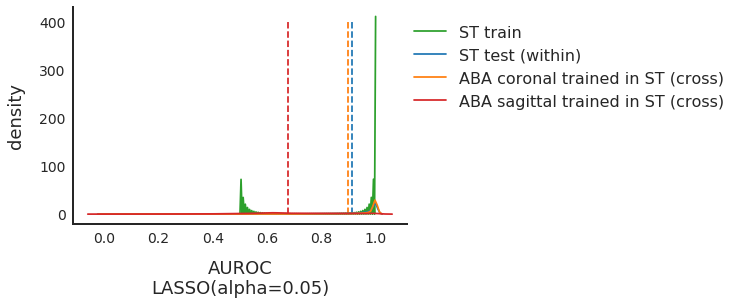

In [48]:
allkdeplts(trainST0p05, testST0p05, STtoCOR0p05, STtoSAG0p05, "ST", "ABA coronal", "ABA sagittal", "LASSO (alpha=0.05)", 400, False)

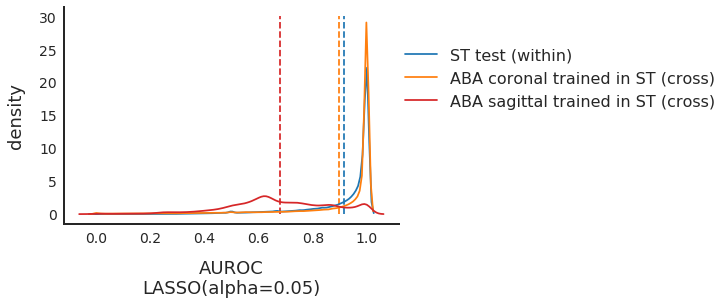

In [50]:
allkdeplts(False, testST0p05, STtoCOR0p05, STtoSAG0p05, "ST", "ABA coronal", "ABA sagittal", "LASSO (alpha=0.05)", 30, "060220_2.pdf")

# ST train, alpha = 0 linear regression

### Read in Data

In [53]:
TRAIN_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_STtrain_0_052920.csv"
TEST_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_STtest_0_052920.csv"
CROSS1_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_STtoCOR_0_052920.csv"
CROSS2_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_STtoSAG_0_052920.csv"

In [54]:
trainST0 = pd.read_csv(TRAIN_FILE, sep=',')
trainST0 = trainST0.set_index(trainST0.columns)

testST0 = pd.read_csv(TEST_FILE, sep=',')
testST0 = testST0.set_index(testST0.columns)

STtoCOR0 = pd.read_csv(CROSS1_FILE, sep=',')
STtoCOR0 = STtoCOR0.set_index(STtoCOR0.columns)

STtoSAG0 = pd.read_csv(CROSS2_FILE, sep=',')
STtoSAG0 = STtoSAG0.set_index(STtoSAG0.columns)

In [55]:
#means
print(uppertrimean(trainST0))
print(uppertrimean(testST0))
print(uppertrimean(STtoCOR0))
print(uppertrimean(STtoSAG0))

0.9999997519359577
0.9711365610936746
0.9637609225922087
0.7349081515695195


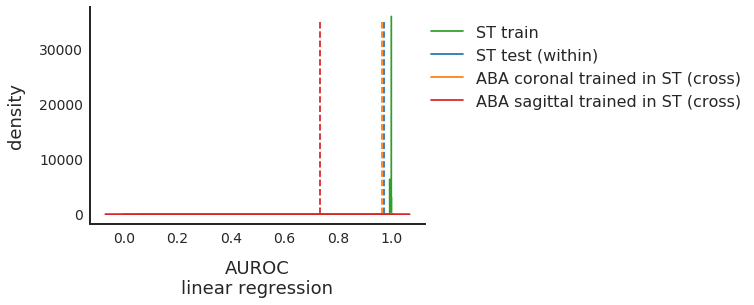

In [57]:
allkdeplts(trainST0, testST0, STtoCOR0, STtoSAG0, "ST", "ABA coronal", "ABA sagittal", "linear regression", 35000, False)

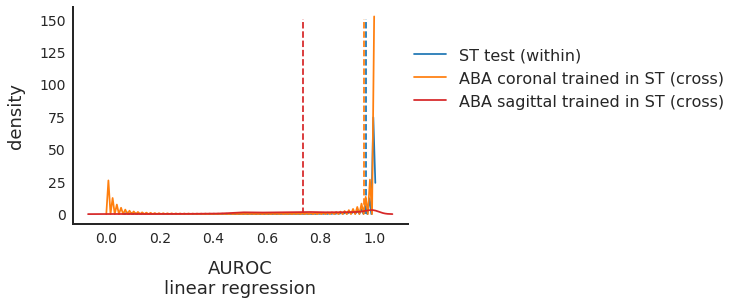

In [59]:
allkdeplts(False, testST0, STtoCOR0, STtoSAG0, "ST", "ABA coronal", "ABA sagittal", "linear regression", 150, "060220_3.pdf")

# ABA coronal train, alpha = 0.1

### Read in Data

In [62]:
TRAIN_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_CORtrain_0p1_053120.csv"
TEST_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_CORtest_0p1_053120.csv"
CROSS1_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_CORtoST_0p1_053120.csv"
CROSS2_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_CORtoSAG_0p1_053120.csv"

In [63]:
trainCOR0p1 = pd.read_csv(TRAIN_FILE, sep=',')
trainCOR0p1 = trainCOR0p1.set_index(trainCOR0p1.columns)

testCOR0p1 = pd.read_csv(TEST_FILE, sep=',')
testCOR0p1 = testCOR0p1.set_index(testCOR0p1.columns)

CORtoST0p1 = pd.read_csv(CROSS1_FILE, sep=',')
CORtoST0p1 = CORtoST0p1.set_index(CORtoST0p1.columns)

CORtoSAG0p1 = pd.read_csv(CROSS2_FILE, sep=',')
CORtoSAG0p1 = CORtoSAG0p1.set_index(CORtoSAG0p1.columns)

In [64]:
#means
print(uppertrimean(trainCOR0p1))
print(uppertrimean(testCOR0p1))
print(uppertrimean(CORtoST0p1))
print(uppertrimean(CORtoSAG0p1))

0.998896908508001
0.9981887729773093
0.7957799581159212
0.6630180606329047


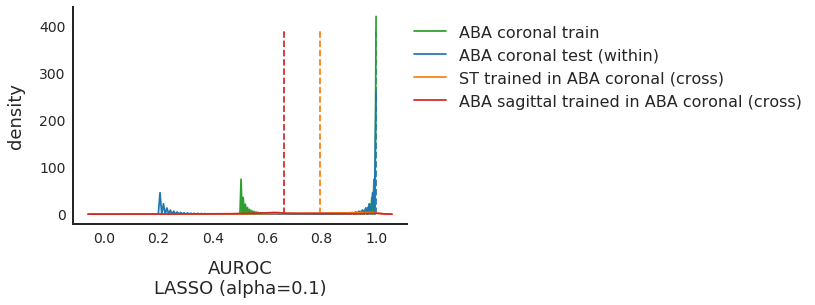

In [65]:
allkdeplts(trainCOR0p1, testCOR0p1, CORtoST0p1, CORtoSAG0p1, "ABA coronal", "ST", "ABA sagittal", "LASSO (alpha=0.1)",390, False)

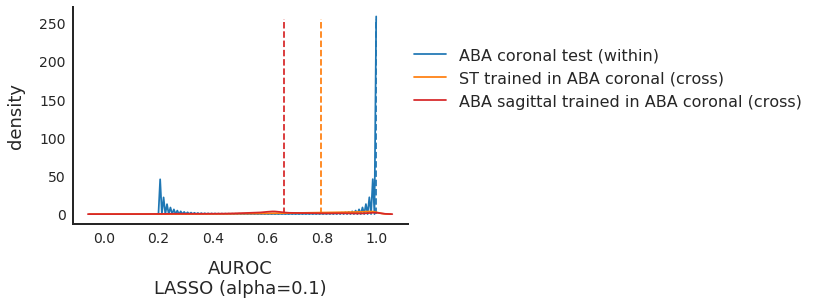

In [68]:
allkdeplts(False, testCOR0p1, CORtoST0p1, CORtoSAG0p1, "ABA coronal", "ST", "ABA sagittal", "LASSO (alpha=0.1)", 255, "060220_4.pdf")

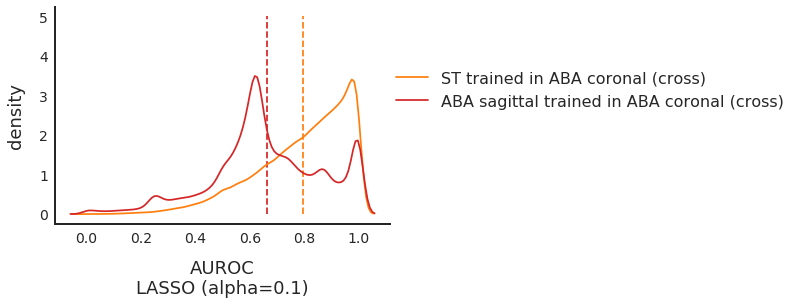

In [71]:
allkdeplts(False, False, CORtoST0p1, CORtoSAG0p1, "ABA coronal", "ST", "ABA sagittal", "LASSO (alpha=0.1)", 5, "060220_5.pdf")

# ABA coronal train, alpha = 0.05

### Read in Data

In [72]:
TRAIN_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_CORtrain_0p05_052820.csv"
TEST_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_CORtest_0p05_052820.csv"
CROSS1_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_CORtoST_0p05_052820.csv"
CROSS2_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_CORtoSAG_0p05_052820.csv"

In [73]:
trainCOR0p05 = pd.read_csv(TRAIN_FILE, sep=',')
trainCOR0p05 = trainCOR0p05.set_index(trainCOR0p05.columns)

testCOR0p05 = pd.read_csv(TEST_FILE, sep=',')
testCOR0p05 = testCOR0p05.set_index(testCOR0p05.columns)

CORtoST0p05 = pd.read_csv(CROSS1_FILE, sep=',')
CORtoST0p05 = CORtoST0p05.set_index(CORtoST0p05.columns)

CORtoSAG0p05 = pd.read_csv(CROSS2_FILE, sep=',')
CORtoSAG0p05 = CORtoSAG0p05.set_index(CORtoSAG0p05.columns)

In [74]:
#means
print(uppertrimean(trainCOR0p05))
print(uppertrimean(testCOR0p05))
print(uppertrimean(CORtoST0p05))
print(uppertrimean(CORtoSAG0p05))

0.9998777770304461
0.9992647461128895
0.8093699818018381
0.6730936057324044


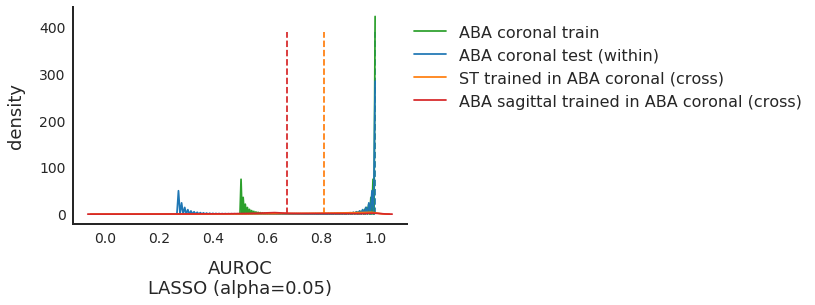

In [75]:
allkdeplts(trainCOR0p05, testCOR0p05, CORtoST0p05, CORtoSAG0p05, "ABA coronal", "ST", "ABA sagittal", "LASSO (alpha=0.05)",390, False)

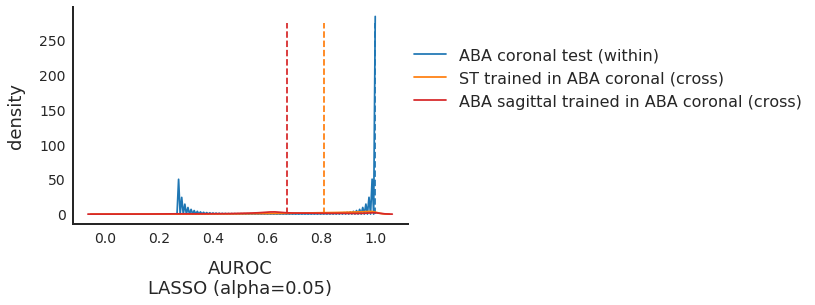

In [77]:
allkdeplts(False, testCOR0p05, CORtoST0p05, CORtoSAG0p05, "ABA coronal", "ST", "ABA sagittal", "LASSO (alpha=0.05)", 275, "060220_6.pdf")

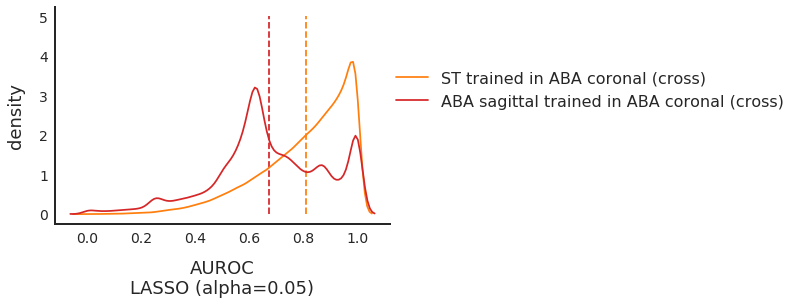

In [79]:
allkdeplts(False, False, CORtoST0p05, CORtoSAG0p05, "ABA coronal", "ST", "ABA sagittal", "LASSO (alpha=0.05)", 5, "060220_7.pdf")

# ABA coronal train, alpha = 0 linear regression

### Read in Data

In [81]:
TRAIN_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_CORtrain_0_052920.csv"
TEST_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_CORtest_0_052920.csv"
CROSS1_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_CORtoST_0_052920.csv"
CROSS2_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_CORtoSAG_0_052920.csv"

In [82]:
trainCOR0 = pd.read_csv(TRAIN_FILE, sep=',')
trainCOR0 = trainCOR0.set_index(trainCOR0.columns)

testCOR0 = pd.read_csv(TEST_FILE, sep=',')
testCOR0 = testCOR0.set_index(testCOR0.columns)

CORtoST0 = pd.read_csv(CROSS1_FILE, sep=',')
CORtoST0 = CORtoST0.set_index(CORtoST0.columns)

CORtoSAG0 = pd.read_csv(CROSS2_FILE, sep=',')
CORtoSAG0 = CORtoSAG0.set_index(CORtoSAG0.columns)

In [83]:
#means
print(uppertrimean(trainCOR0))
print(uppertrimean(testCOR0))
print(uppertrimean(CORtoST0))
print(uppertrimean(CORtoSAG0))

0.9999999417047418
0.9994848581580676
0.8944570958640351
0.7307783252954335


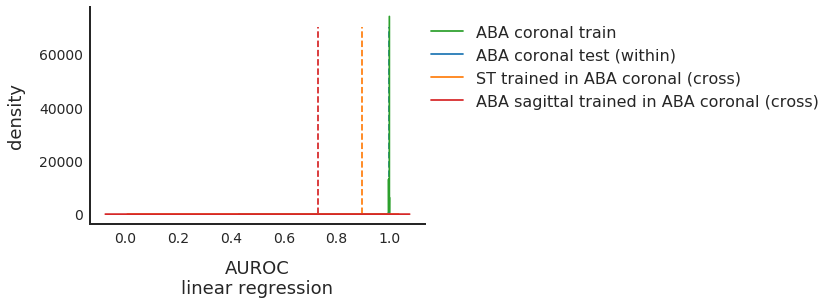

In [88]:
allkdeplts(trainCOR0, testCOR0, CORtoST0, CORtoSAG0, "ABA coronal", "ST", "ABA sagittal", "linear regression",70000, False)

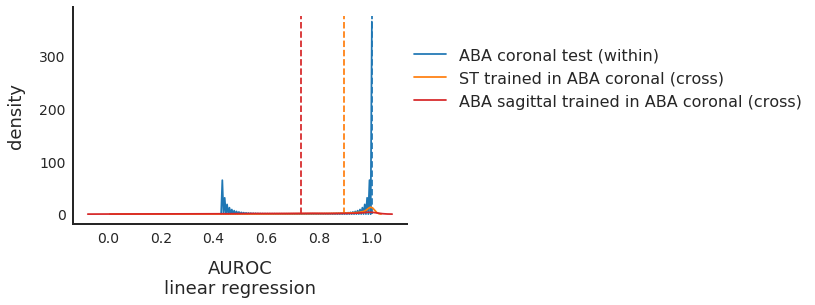

In [91]:
allkdeplts(False, testCOR0, CORtoST0, CORtoSAG0, "ABA coronal", "ST", "ABA sagittal", "linear regression", 375, "060220_8.pdf")

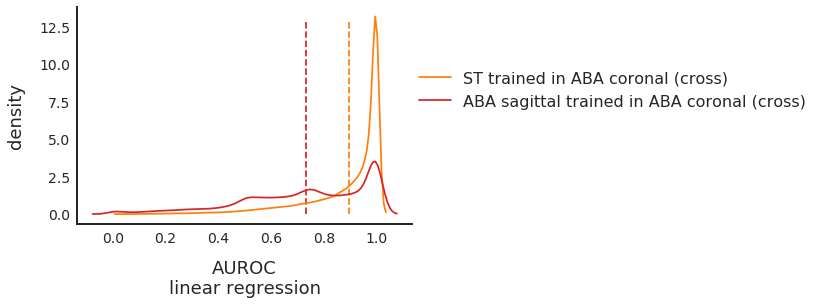

In [93]:
allkdeplts(False, False, CORtoST0, CORtoSAG0, "ABA coronal", "ST", "ABA sagittal", "linear regression", 13, "060220_9.pdf")

# ABA sagittal train, alpha = 0.1

### Read in Data

In [94]:
TRAIN_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_SAGtrain_0p1_053120.csv"
TEST_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_SAGtest_0p1_053120.csv"
CROSS1_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_SAGtoST_0p1_053120.csv"
CROSS2_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_SAGtoCOR_0p1_053120.csv"

In [95]:
trainSAG0p1 = pd.read_csv(TRAIN_FILE, sep=',')
trainSAG0p1 = trainSAG0p1.set_index(trainSAG0p1.columns)

testSAG0p1 = pd.read_csv(TEST_FILE, sep=',')
testSAG0p1 = testSAG0p1.set_index(testSAG0p1.columns)

SAGtoST0p1 = pd.read_csv(CROSS1_FILE, sep=',')
SAGtoST0p1 = SAGtoST0p1.set_index(SAGtoST0p1.columns)

SAGtoCOR0p1 = pd.read_csv(CROSS2_FILE, sep=',')
SAGtoCOR0p1 = SAGtoCOR0p1.set_index(SAGtoCOR0p1.columns)

In [96]:
#means
print(uppertrimean(trainSAG0p1))
print(uppertrimean(testSAG0p1))
print(uppertrimean(SAGtoST0p1))
print(uppertrimean(SAGtoCOR0p1))

0.9491458380077359
0.9281822771797584
0.6519139779143774
0.7749808524133484


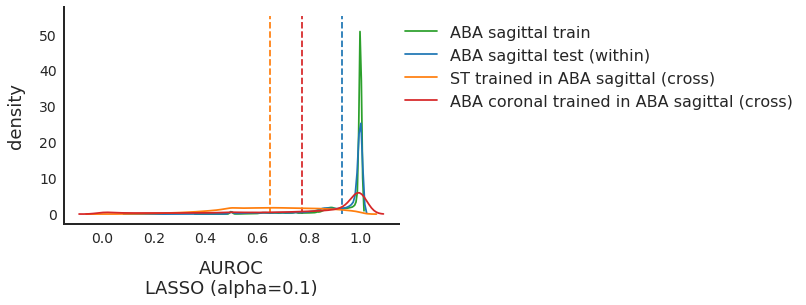

In [99]:
allkdeplts(trainSAG0p1, testSAG0p1, SAGtoST0p1, SAGtoCOR0p1, "ABA sagittal", "ST", "ABA coronal", "LASSO (alpha=0.1)",55, False)

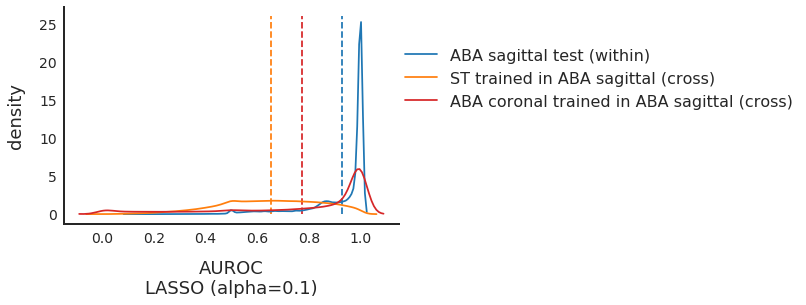

In [114]:
allkdeplts(False, testSAG0p1, SAGtoST0p1, SAGtoCOR0p1, "ABA sagittal", "ST", "ABA coronal", "LASSO (alpha=0.1)", 26, "060220_10.pdf")

# ABA sagittal train, alpha = 0.05

### Read in Data

In [105]:
TRAIN_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_SAGtrain_0p05_052820.csv"
TEST_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_SAGtest_0p05_052820.csv"
CROSS1_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_SAGtoST_0p05_052820.csv"
CROSS2_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_SAGtoCOR_0p05_052820.csv"

In [106]:
trainSAG0p05 = pd.read_csv(TRAIN_FILE, sep=',')
trainSAG0p05 = trainSAG0p05.set_index(trainSAG0p05.columns)

testSAG0p05 = pd.read_csv(TEST_FILE, sep=',')
testSAG0p05 = testSAG0p05.set_index(testSAG0p05.columns)

SAGtoST0p05 = pd.read_csv(CROSS1_FILE, sep=',')
SAGtoST0p05 = SAGtoST0p05.set_index(SAGtoST0p05.columns)

SAGtoCOR0p05 = pd.read_csv(CROSS2_FILE, sep=',')
SAGtoCOR0p05 = SAGtoCOR0p05.set_index(SAGtoCOR0p05.columns)

In [107]:
#means
print(uppertrimean(trainSAG0p05))
print(uppertrimean(testSAG0p05))
print(uppertrimean(SAGtoST0p05))
print(uppertrimean(SAGtoCOR0p05))

0.9709203133909471
0.9532332901235083
0.6622165131310094
0.7876506598918037


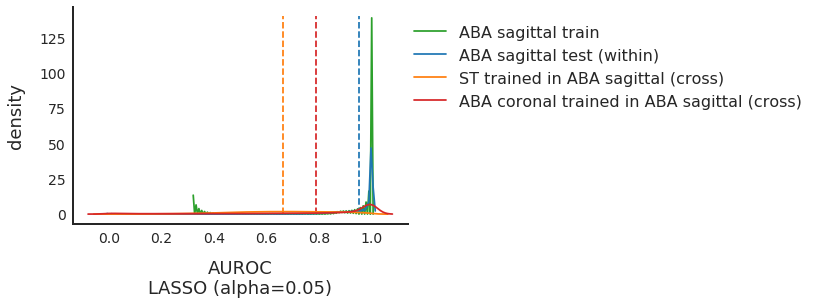

In [110]:
allkdeplts(trainSAG0p05, testSAG0p05, SAGtoST0p05, SAGtoCOR0p05, "ABA sagittal", "ST", "ABA coronal", "LASSO (alpha=0.05)",140, False)

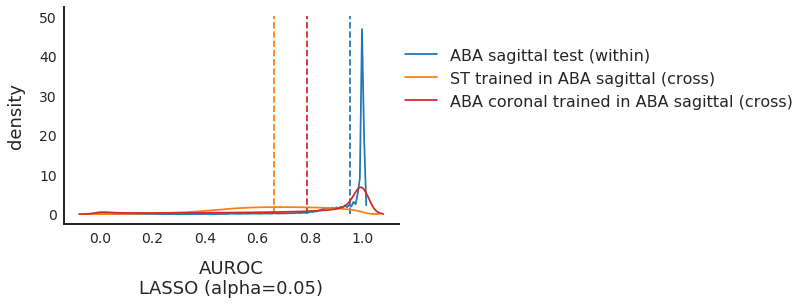

In [113]:
allkdeplts(False, testSAG0p05, SAGtoST0p05, SAGtoCOR0p05, "ABA sagittal", "ST", "ABA coronal", "LASSO (alpha=0.05)", 50, "060220_11.pdf")

# ABA sagittal train, alpha = 0 linear regression

### Read in Data

In [116]:
TRAIN_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_SAGtrain_0_052920.csv"
TEST_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_SAGtest_0_052920.csv"
CROSS1_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_SAGtoST_0_052920.csv"
CROSS2_FILE = "/home/slu/spatial/data/crossplane_lasso/crossplane_SAGtoCOR_0_052920.csv"

In [117]:
trainSAG0 = pd.read_csv(TRAIN_FILE, sep=',')
trainSAG0 = trainSAG0.set_index(trainSAG0.columns)

testSAG0 = pd.read_csv(TEST_FILE, sep=',')
testSAG0 = testSAG0.set_index(testSAG0.columns)

SAGtoST0 = pd.read_csv(CROSS1_FILE, sep=',')
SAGtoST0 = SAGtoST0.set_index(SAGtoST0.columns)

SAGtoCOR0 = pd.read_csv(CROSS2_FILE, sep=',')
SAGtoCOR0 = SAGtoCOR0.set_index(SAGtoCOR0.columns)

In [118]:
#means
print(uppertrimean(trainSAG0))
print(uppertrimean(testSAG0))
print(uppertrimean(SAGtoST0))
print(uppertrimean(SAGtoCOR0))

0.9886969729076999
0.835365619860918
0.604855557711121
0.6994436045072803


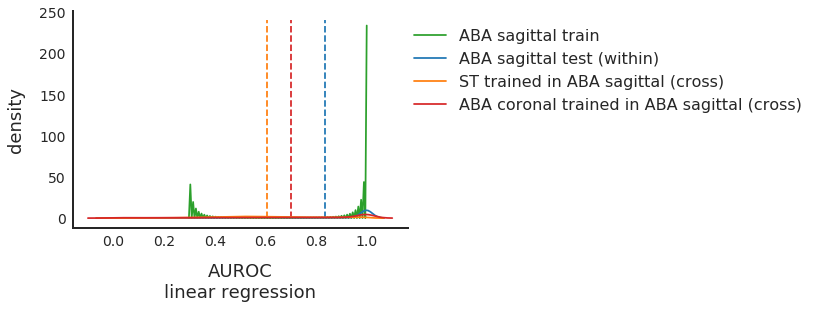

In [120]:
allkdeplts(trainSAG0, testSAG0, SAGtoST0, SAGtoCOR0, "ABA sagittal", "ST", "ABA coronal", "linear regression",240, False)

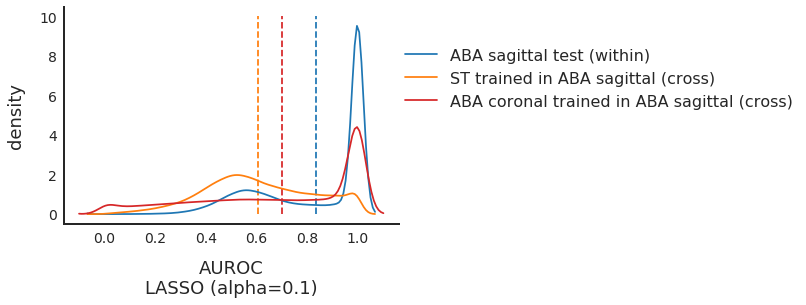

In [122]:
allkdeplts(False, testSAG0, SAGtoST0, SAGtoCOR0, "ABA sagittal", "ST", "ABA coronal", "LASSO (alpha=0.1)", 10, "060220_12.pdf")